# Detection and Classification of Thorax Diseases on NIH Chest Xray Dataset ( CNNs ) - Subset

*This subset is only for demo `Contains: 1000 samples only`*

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

### Datasets

In [2]:
IMG_DIR = './Datasets/images-small/'

In [3]:
df_small = pd.read_csv('Datasets/train-subset.csv')
print(f'Shape: {df_small.shape}')
df_small.head(3)

Shape: (1000, 16)


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0


### Image Preprocessing

In [4]:
SIZE = 256
X_dataset = []  
for i in tqdm(range(df_small.shape[0])):
    img = image.load_img(IMG_DIR + df_small['Image'][i], target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

100%|██████████| 1000/1000 [00:06<00:00, 156.58it/s]


#### Convert Images, Labels to numpy array

In [5]:
X_dataset = np.array(X_dataset)
# print(df['Image'][999])

y_dataset = np.array(df_small.drop(['Image', 'PatientId'], axis=1))

print(f'Image Shape :{X_dataset.shape}')
print(f'Label Shape :{y_dataset.shape}')

Image Shape :(1000, 256, 256, 3)
Label Shape :(1000, 14)


### Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, random_state=20, test_size=0.3)

print(f'Train Shape :{X_train.shape, y_train.shape}')
print(f'Test Shape :{X_test.shape, y_test.shape}')

Train Shape :((700, 256, 256, 3), (700, 14))
Test Shape :((300, 256, 256, 3), (300, 14))


## Model

In [7]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 16)      1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 252, 252, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 32)        1

## Training

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/15
11/11 [==============================] - 25s 2s/step - loss: 0.7880 - accuracy: 0.0687 - val_loss: 0.5913 - val_accuracy: 0.0233
Epoch 2/15
11/11 [==============================] - 27s 2s/step - loss: 0.4623 - accuracy: 0.0924 - val_loss: 0.5143 - val_accuracy: 0.0567
Epoch 3/15
11/11 [==============================] - 27s 2s/step - loss: 0.3803 - accuracy: 0.1326 - val_loss: 0.3623 - val_accuracy: 0.3800
Epoch 4/15
11/11 [==============================] - 27s 2s/step - loss: 0.3457 - accuracy: 0.1215 - val_loss: 0.2602 - val_accuracy: 0.1133
Epoch 5/15
11/11 [==============================] - 27s 2s/step - loss: 0.3146 - accuracy: 0.1333 - val_loss: 0.2913 - val_accuracy: 0.5100
Epoch 6/15
11/11 [==============================] - 27s 2s/step - loss: 0.2909 - accuracy: 0.1487 - val_loss: 0.2731 - val_accuracy: 0.5333
Epoch 7/15
11/11 [==============================] - 27s 2s/step - loss: 0.2675 - accuracy: 0.1398 - val_loss: 0.2359 - val_accuracy: 0.5067
Epoch 8/15
11/11 [==

## Evaluation (Loss & Accuracy)

x----------- Loss  ----------- x


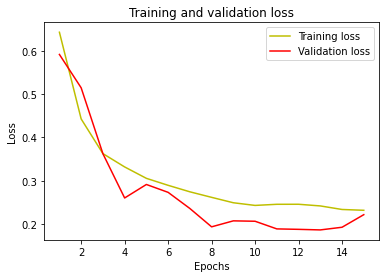

x----------- Accuracy ----------- x


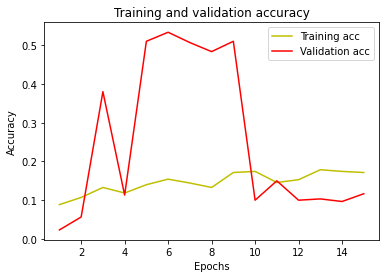

In [10]:
print('x----------- Loss  ----------- x')
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('x----------- Accuracy ----------- x')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Inference | Prediction

Mass (0.329)
Emphysema (0.321)
Nodule (0.248)
Cardiomegaly (0.24)
PatientId (0.233)
Pneumothorax (0.212)
Hernia (0.178)
Consolidation (0.168)
Fibrosis (0.164)
Effusion (0.164)
10/10 [==============================] - 2s 152ms/step - loss: 0.2216 - accuracy: 0.1167
Accuracy =  11.666666716337204 %


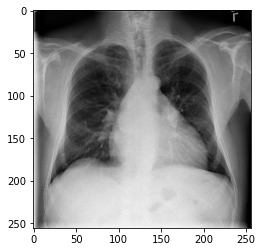

In [11]:
# Cardiomegaly : Enlarged condition of Heart
img = image.load_img('Datasets/00000001_000.png', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df_small.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

#Print classes and corresponding probabilities
for i in range(10):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

***